In [ ]:
!pip install --upgrade google-cloud-bigquery

from scipy.stats import ks_2samp
from scipy.stats import f_oneway
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import matplotlib.dates as mdates
from scipy.stats import shapiro
from scipy.stats import spearmanr
import itertools
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import numpy as np


auth.authenticate_user()

client = bigquery.Client(project="data-analytics-mate")

query = """


SELECT
      j_ses.date AS date_order,
      j_ses.ga_session_id AS session_id,
      ses_par.continent AS continent,
      ses_par.country AS country,
      ses_par.device AS device,
      ses_par.browser AS browser,
      ses_par.mobile_model_name AS mobile_model_name,
      ses_par.operating_system AS operating_system,
      ses_par.language AS language,
      ses_par.channel AS channel,
      acc_ses.account_id AS account_id,
      acc.is_verified AS is_verified,
      acc.is_unsubscribed AS is_unsubscribed,
      prdc.category AS category,
      prdc.name AS name,
      prdc.price AS price,
      prdc.short_description AS short_description
FROM `data-analytics-mate.DA.session` AS j_ses
JOIN `data-analytics-mate.DA.session_params`  AS ses_par
ON j_ses.ga_session_id = ses_par.ga_session_id
LEFT JOIN `data-analytics-mate.DA.order` AS ord
ON ord.ga_session_id = j_ses.ga_session_id
LEFT JOIN `data-analytics-mate.DA.product` AS prdc
ON ord.item_id = prdc.item_id
LEFT JOIN `data-analytics-mate.DA.account_session` AS acc_ses
ON j_ses.ga_session_id = acc_ses.ga_session_id
LEFT JOIN `data-analytics-mate.DA.account` AS acc
ON acc_ses.account_id = acc.id
ORDER BY date_order
"""

# Request execution
query_job = client.query(query)  # Executing an SQL query
results = query_job.result()  # Waiting for the request to complete



In [ ]:
# Converting results to a DataFrame
df = results.to_dataframe()

# Result output
df.head()


,date_order,session_id,continent,country,device,browser,mobile_model_name,operating_system,language,channel,account_id,is_verified,is_unsubscribed,category,name,price,short_description
0,2020-11-01,65223751,Americas,United States,mobile,Chrome,<Other>,Web,en-us,Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None
1,2020-11-01,7115337200,Europe,United Kingdom,desktop,Chrome,Chrome,Web,en-us,Organic Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3978035233,Europe,Norway,mobile,Chrome,<Other>,Web,zh,Direct,<NA>,<NA>,<NA>,Tables & desks,RÅSKOG,189.0,"Trolley, 35x45x78 cm"
3,2020-11-01,9648986282,Africa,Nigeria,mobile,Chrome,<Other>,Android,es-es,Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
4,2020-11-01,4393441533,Asia,China,desktop,Chrome,Chrome,Windows,en-us,Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"


In [ ]:
# Name of the columns
name_columns = df.columns.tolist()
print(name_columns)












['date_order', 'session_id', 'continent', 'country', 'device', 'browser', 'mobile_model_name', 'operating_system', 'language', 'channel', 'account_id', 'is_verified', 'is_unsubscribed', 'category', 'name', 'price', 'short_description']


In [ ]:
# Number of the columns
number_of_columns = df.shape[1]
print(f"The number of columns are - {number_of_columns}")
print(name_columns)

The number of columns are - 17
['date_order', 'session_id', 'continent', 'country', 'device', 'browser', 'mobile_model_name', 'operating_system', 'language', 'channel', 'account_id', 'is_verified', 'is_unsubscribed', 'category', 'name', 'price', 'short_description']


In [ ]:
# Numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric_list = df_numeric.columns.to_list()
print(f"The numeric columns are: {df_numeric_list} ")
quantity_of_numeric = df_numeric.shape[1]
print(f"The quantity of numeric columns are - {quantity_of_numeric}")

The numeric columns are: ['session_id', 'account_id', 'is_verified', 'is_unsubscribed', 'price'] 
The quantity of numeric columns are - 5


In [ ]:
# Categorical columns
df_categorical = df.select_dtypes(include=['object','category'])
df_categorical_list = df_categorical.columns.to_list()
print(f"The categorical columns are  - {df_categorical_list}")
quantity_of_categorical = len(df_categorical.columns)
print(f"The quantity of categorical columns are - {quantity_of_categorical}")

The categorical columns are  - ['continent', 'country', 'device', 'browser', 'mobile_model_name', 'operating_system', 'language', 'channel', 'category', 'name', 'short_description']
The quantity of categorical columns are - 11


In [ ]:
# Datetime columns
df_datetime = df.select_dtypes(include=['datetime'])
df_datetime_list = df_datetime.columns.to_list()
print(f"The datetime columns are  - {df_datetime_list}")
quantite_datetime = len(df_datetime.columns)
print(f"Quantity of datetime columns  - {quantite_datetime}")

The datetime columns are  - []
Quantity of datetime columns  - 0


In [ ]:
# Amount of unique sessions
unique_sessions = df["session_id"].unique()
print(unique_sessions)
amount_unique_sessions = df["session_id"].nunique()
print(f"Total amount of unique sessions - {amount_unique_sessions}")

<IntegerArray>
[  65223751, 7115337200, 3978035233, 9648986282, 4393441533,  967742695,
 1115082532, 6586349543, 5041302343, 1129172264,
 ...
 1714444546,  167350204, 1587098569, 3237997913, 8195390046, 5756982967,
  464560636, 6336117447, 4958826563, 7058940865]
Length: 349545, dtype: Int64
Total amount of unique sessions - 349545


In [ ]:
# What time period is being considered
print(df['date_order'].dtype)
df['date_order'] = pd.to_datetime(df['date_order'])
print(df['date_order'].dtype)
start_time = df['date_order'].min()
end_time = df['date_order'].max()
print(f"The considered time is from {start_time.date()} to {end_time.date()}")

dbdate
datetime64[ns]
The considered time is from 2020-11-01 to 2021-01-31


In [ ]:
# Missing Values
missing_values = df.isnull() # check all the missing values
print(missing_values)

total_missing_values = df.isnull().sum().sum() # total missing values in our DataFrame
print(f"Total missing values are - {total_missing_values}")





        date_order  session_id  continent  country  device  browser  \
0            False       False      False    False   False    False   
1            False       False      False    False   False    False   
2            False       False      False    False   False    False   
3            False       False      False    False   False    False   
4            False       False      False    False   False    False   
...            ...         ...        ...      ...     ...      ...   
349540       False       False      False    False   False    False   
349541       False       False      False    False   False    False   
349542       False       False      False    False   False    False   
349543       False       False      False    False   False    False   
349544       False       False      False    False   False    False   

        mobile_model_name  operating_system  language  channel  account_id  \
0                   False             False     False    False       

In [ ]:
# Which columns have more missing values, what is the reason?
print(df.isnull().sum().sort_values(ascending = False)) #amount of missing values in every column

is_verified          321600
account_id           321600
is_unsubscribed      321600
name                 316007
category             316007
price                316007
short_description    316007
language             114266
date_order                0
operating_system          0
mobile_model_name         0
browser                   0
device                    0
continent                 0
country                   0
session_id                0
channel                   0
dtype: int64


**Which columns have more missing values, and why?**

*When performing a left join, all rows from the left table are preserved, while only matching rows from the right table are included. If there is no match for a given key, the corresponding columns from the right table will contain NaN values**

In [ ]:
# Amount of Unique Account ID
unique_accounts = df['account_id'].nunique()
unique_sessions = df['session_id'].nunique()
percentage_registered = unique_accounts / unique_sessions * 100

print(f"The total amount of Unique Accounts is - {unique_accounts}")
print(f"The total amount of Unique Sessions is - {unique_sessions}")
print(f"Percentage of sessions with registered accounts: {percentage_registered:.2f}%")

The total amount of Unique Accounts is - 27945
The total amount of Unique Sessions is - 349545
Percentage of sessions with registered accounts: 7.99%


In [ ]:
# Average of sessions per account, session_distribution, % of users with more than 1 session
avg_session_per_account = df.groupby('account_id')['session_id'].nunique().mean()
print(f"Sessions per account - {avg_session_per_account}")

session_distribution = df.groupby('account_id')['session_id'].nunique()
print(session_distribution.describe())

# Users with more than 1 session
multisession_users = (session_distribution > 1).mean() * 100
print(f"% of users with more than one session: {multisession_users:.2f}%")

Sessions per account - 1.0
count    27945.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: session_id, dtype: float64
% of users with more than one session: 0.00%


In [ ]:
# Average products by session
prdc_by_session = df.groupby('session_id')['category'].count().sort_values(ascending=False)
mean_prdc_by_session = prdc_by_session.mean()
print(prdc_by_session)
print(mean_prdc_by_session.round(2))

session_id
9999695738    1
9999502341    1
9999080229    1
9998242493    1
330355        1
             ..
365440        0
489227        0
502183        0
521022        0
525202        0
Name: category, Length: 349545, dtype: int64
0.1


In [ ]:
# The most popular products
prdc_popularity = df.groupby('name')['price'].sum().sort_values(ascending=False).head(20)
print(f"The most popular products: \n{ prdc_popularity}")
#print(prdc_popularity)

The most popular products: 
name
GRÖNLID                2299190.0
LIDHULT                2257508.0
VIMLE                  1710015.0
BESTÅ                  1100634.5
VALLENTUNA             1014376.0
KIVIK                   877763.0
BEKANT                  797761.0
HAVSTA                  627430.0
SOLLERÖN                604380.0
NORSBORG                590140.0
LANDSKRONA              573350.0
IVAR                    529356.0
DELAKTIG                526585.0
NORDLI                  499250.0
HAVSTEN                 494740.0
ÄPPLARÖ                 460743.0
HEMNES                  441033.0
SÖDERHAMN               423109.0
EKEDALEN / EKEDALEN     367802.0
GALANT                  353070.0
Name: price, dtype: float64


In [ ]:
# Sales, average check and transaction count by countries
country_sales = df.groupby('country')['price'].sum().sort_values(ascending=False).head(20)
print(f"Sales distributed by countries:\n{country_sales}")

avg_check = df.groupby('country')['price'].mean().sort_values(ascending=False).head(20)
print(f"The average check by countries:\n{avg_check.round(2)}")

transaction_count = df['country'].value_counts().head(20)
print(f"Transaction count by country:\n{transaction_count}")

Sales distributed by countries:
country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Spain               631546.7
Germany             599221.4
China               588329.6
Taiwan              552710.3
Singapore           456447.2
Japan               417509.1
South Korea         413158.2
Italy               396242.1
Brazil              339001.8
Poland              318114.0
Australia           315892.2
Netherlands         306329.0
Indonesia           303245.3
Ukraine             300046.0
Turkey              298534.5
Name: price, dtype: float64
The average check by countries:
country
Palestine               1747.69
Bulgaria                1518.11
Albania                 1401.50
Venezuela               1396.77
Kenya                   1373.48
Honduras                1372.20
Oman                    1357.77
Algeria                 1293.67
Lithuania               1282.25
Kazakhstan              

In [ ]:
# What percentage of registered users unsubscribed from the newsletter?
varified_users = df[df['is_verified'] == True]
unsubsribed_users = varified_users[varified_users['is_unsubscribed'] == True]

unsubscribe_percentage = (unsubsribed_users['account_id'].nunique() / varified_users['account_id'].nunique() * 100)
print(f"Percentage of Unsubscribe Users - {unsubscribe_percentage:.2f}%")


Percentage of Unsubscribe Users - 21.48%


In [ ]:
# Revenue by Date
date_revenue = (df.groupby(df['date_order'].dt.date)['price'].sum().sort_index())
print(date_revenue)

date_order
2020-11-01    244292.5
2020-11-02    355506.8
2020-11-03    498979.6
2020-11-04    339187.1
2020-11-05    391276.6
                ...   
2021-01-27    286340.7
2021-01-28         0.0
2021-01-29         0.0
2021-01-30         0.0
2021-01-31         0.0
Name: price, Length: 92, dtype: float64


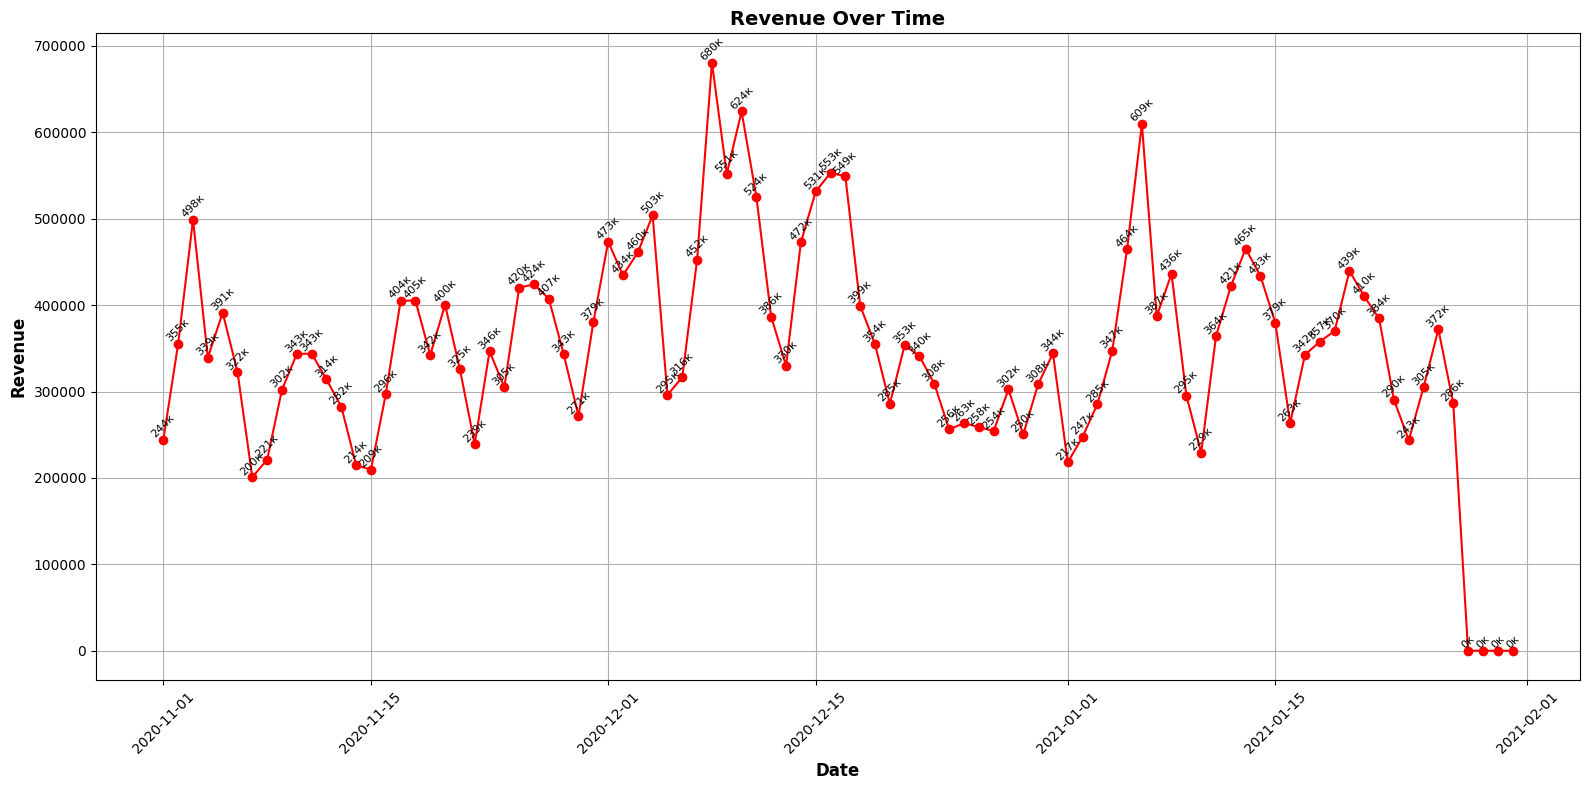

In [ ]:
# Visualization of Revenue by Date
date_revenue = (
    df.groupby(df['date_order'].dt.date)['price']
    .sum()
    .sort_index()
)
plt.figure(figsize=(16, 8))
plt.plot(date_revenue.index, date_revenue.values, marker='o', linestyle='-',color='red')

for x, y in zip(date_revenue.index, date_revenue.values):
    label = f'{int(y / 1000)}к'
    plt.text(x, y, label, ha='center', va='bottom', fontsize=8, rotation=45)

plt.title('Revenue Over Time',fontsize=14, fontweight='bold')
plt.xlabel('Date',fontsize=12,fontweight='bold')
plt.ylabel('Revenue',fontsize=12,fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Fluctuations in revenue across dates indicate dynamic patterns in customer behavior. These variations may point to:**

*Seasonal factors — such as increased demand during holidays or post-holiday periods.*

*Marketing activities — promotions, discounts, or product launches that stimulate sales.*

*Product-specific popularity — certain items may experience peak demand on specific days.*

*External circumstances — market shifts, weather conditions, or competitor actions.*

*For deeper analysis, it’s worth comparing these trends with previous periods, segmenting by product categories or customer groups, and factoring in the event calendar.*

In [ ]:
# Total Sales by Continent
sales_by_continent = df.groupby('continent')['price'].sum().sort_values(ascending=False)
print(f"Sales by {sales_by_continent}")

Sales by continent
Americas     17665280.0
Asia          7601298.3
Europe        5934624.2
Oceania        365230.2
Africa         331231.0
(not set)       74067.4
Name: price, dtype: float64


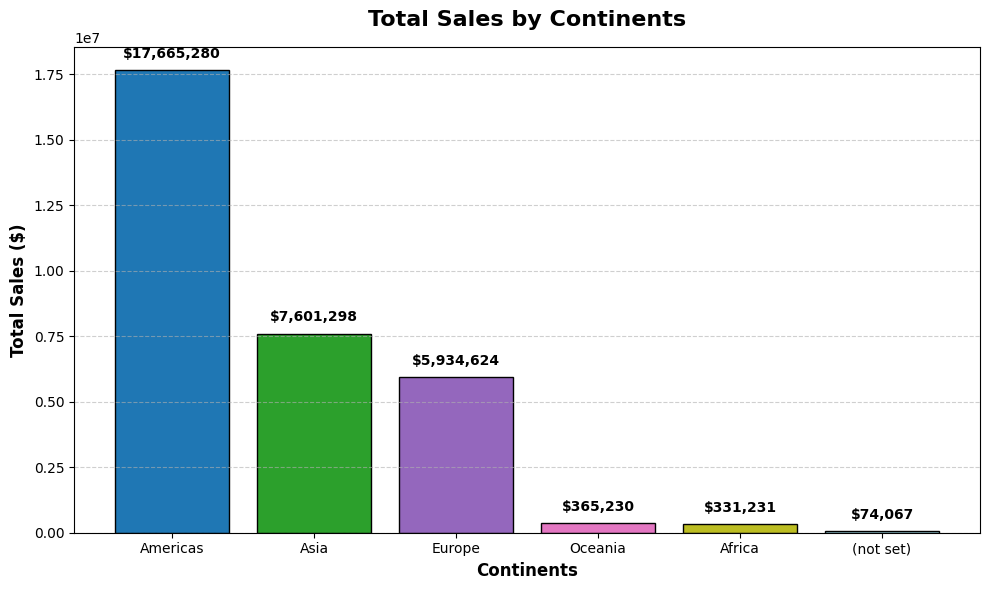

In [ ]:
# Vusialization of Total Sales by Continent
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, len(sales_by_continent)))
bars = plt.bar(
    sales_by_continent.index,
    sales_by_continent.values,
    color=colors,
    edgecolor='black'
)
plt.title("Total Sales by Continents", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Continents", fontsize=12, fontweight='bold')
plt.ylabel("Total Sales ($)", fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + max(sales_by_continent.values)*0.02,
        f"${int(yval):,}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

**Analyzing the geographic distribution of sales helps assess which regions generate the highest revenue. This enables you to:**

*Identify key markets — for example, the Americas show the highest sales volume, indicating strong presence or demand in that region.*

*Reveal growth potential — regions with lower performance, such as Africa, Oceania, or (not set), may offer opportunities for expansion or marketing strategy optimization.*

*Prioritize resources — understanding regional performance helps allocate budgets more effectively, tailor communication, and plan logistics.*

*This chart serves as a valuable tool for strategic planning, product localization, and evaluating market opportunities.*

In [ ]:
# Sales dynamics in America, Asia and Europe by Date
df['date_order'] = pd.to_datetime(df['date_order'])
target_continents = ['Americas', 'Asia', 'Europe']
df_filtered = df[df['continent'].isin(target_continents)]
print(target_continents)
grouped = (df_filtered.groupby([df_filtered['date_order'].dt.date, 'continent'])['price'].sum())
print(grouped)

['Americas', 'Asia', 'Europe']
date_order  continent
2020-11-01  Americas     132002.5
            Asia          63823.0
            Europe        46908.0
2020-11-02  Americas     193861.0
            Asia          79370.0
                           ...   
2021-01-30  Asia              0.0
            Europe            0.0
2021-01-31  Americas          0.0
            Asia              0.0
            Europe            0.0
Name: price, Length: 276, dtype: float64


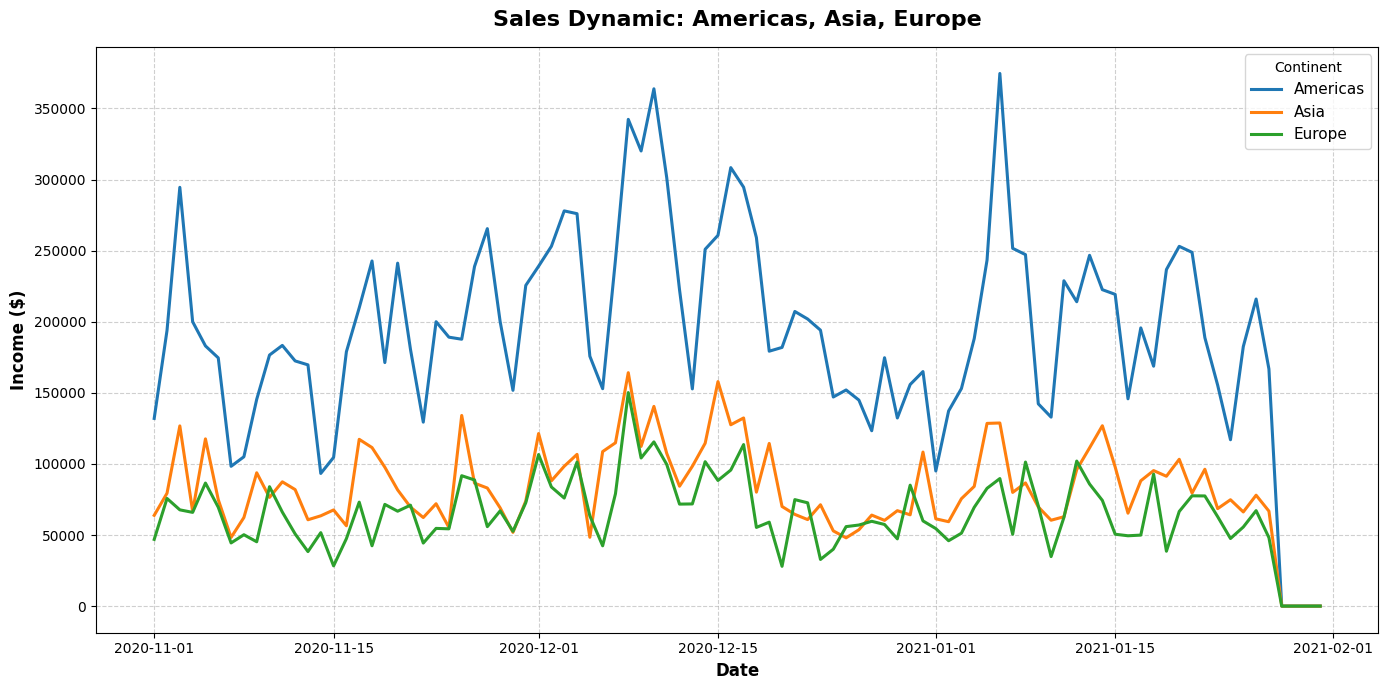

In [ ]:
# Visualization of Sales dynamics in America, Asia and Europe by Date
grouped_df = grouped.reset_index().pivot(index='date_order', columns='continent', values='price')
plt.figure(figsize=(14, 7))


colors = {
    'Americas': '#1f77b4',
    'Asia': '#ff7f0e',
    'Europe': '#2ca02c'
}

for continent in target_continents:
    if continent in grouped_df.columns:
        plt.plot(grouped_df.index, grouped_df[continent], label=continent, linewidth=2.2, color=colors[continent])

plt.title('Sales Dynamic: Americas, Asia, Europe', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Income ($)', fontsize=12, fontweight='bold')
plt.legend(title='Continent', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Conclusion:**

*Track sales dynamics in each region — this helps reveal how demand changes over time, which days are peak and which are weaker.*

*Compare markets with one another — for example, the Americas may show sharp spikes, indicating promotions or seasonality, while Asia demonstrates more stable performance.*

*Identify trends and anomalies — for instance, a decline in Europe may signal changes in customer behavior or external factors.*

In [ ]:
# Total Sales by Channel
sales_channel = df.groupby('channel')['price'].sum().sort_values(ascending=False)
print(f"Sales by {sales_channel}")

Sales by channel
Organic Search    11433151.6
Paid Search        8511049.4
Direct             7494923.4
Social Search      2532105.7
Undefined          2000501.0
Name: price, dtype: float64


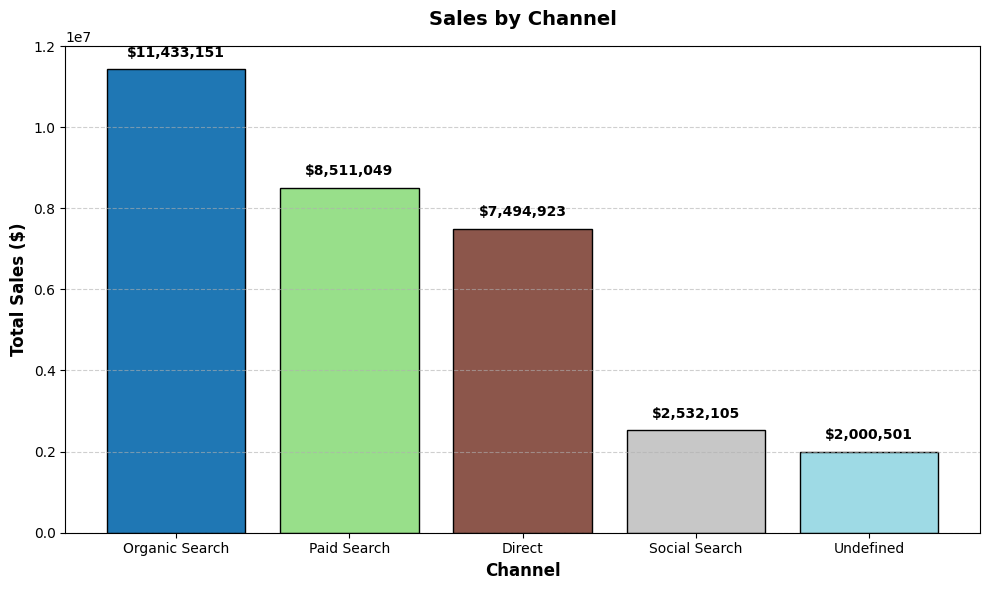

In [ ]:
# Visualisation of Total Sales by Channel
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, len(sales_channel)))
bars = plt.bar(
    sales_channel.index,
    sales_channel.values,
    color=colors,
    edgecolor='black'
)
plt.title("Sales by Channel", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Channel", fontsize=12, fontweight='bold')
plt.ylabel("Total Sales ($)", fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + max(sales_channel.values)*0.02,
        f"${int(yval):,}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

**Aggregated revenue analysis by channel provides a clear picture of marketing source performance:**

*Organic Search ($11,433,151) — the absolute leader. This indicates a strong strategy, high brand awareness, or quality content that attracts users.*

*Paid Search ($8,511,049) — ranks second. The channel generates substantial revenue but requires ongoing monitoring, as it relies on paid traffic.*

*Direct ($7,949,923) — a stable figure, which may reflect customer loyalty or effective branding.*

*Social Search ($2,532,105) — lower performance, but a potentially promising channel.*

*Undefined ($2,000,501) — a technical category that may include improperly tracked sessions. It’s worth reviewing analytics settings to reduce the share of “undefined” traffic.*

In [ ]:
# Sales Dynamics by Channel and by Date
grouped_sales_channel = (df.groupby([df['date_order'].dt.date, 'channel'])['price'].sum())
print(grouped_sales_channel)

date_order  channel       
2020-11-01  Direct            54669.5
            Organic Search    95112.0
            Paid Search       64688.0
            Social Search     25078.0
            Undefined          4745.0
                               ...   
2021-01-31  Direct                0.0
            Organic Search        0.0
            Paid Search           0.0
            Social Search         0.0
            Undefined             0.0
Name: price, Length: 460, dtype: float64


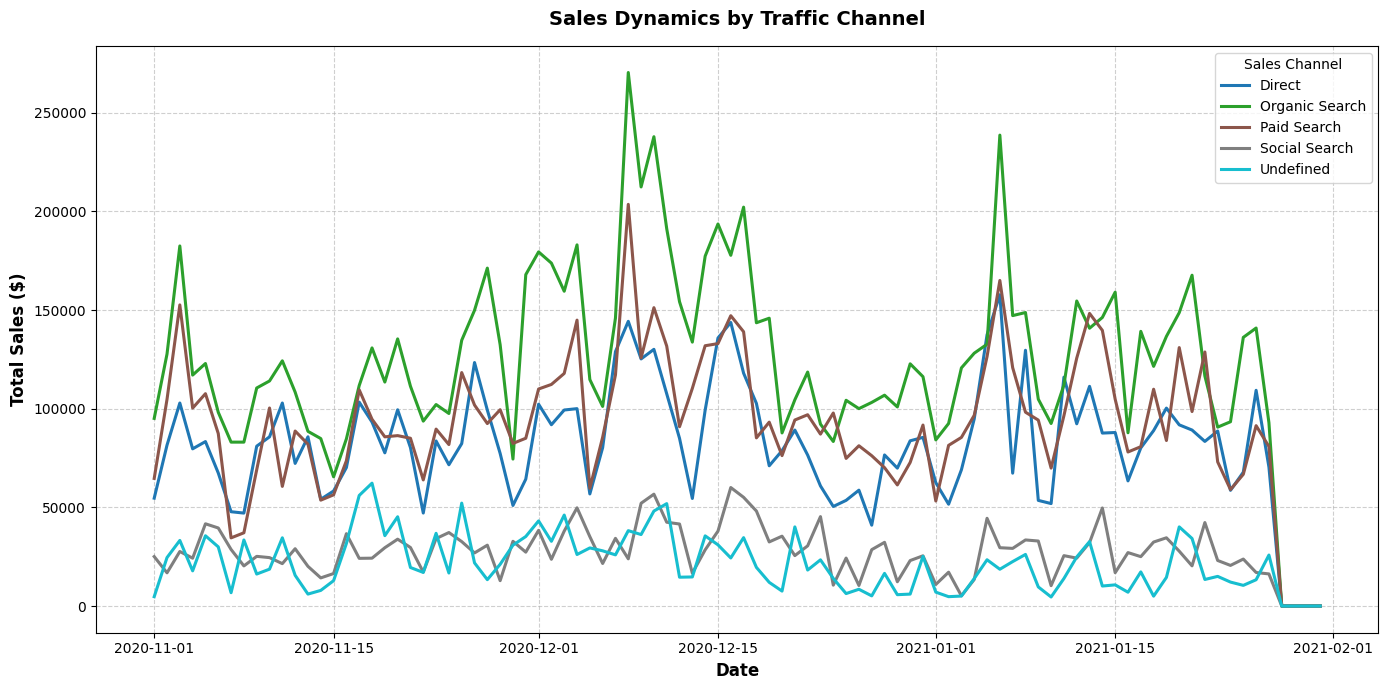

In [ ]:
# Visualization of Sales Dynamics by Channel and by Date
sales_by_date_channel = (
    df.groupby([df['date_order'].dt.date, 'channel'])['price']
    .sum()
    .reset_index()
)

pivot_sales = sales_by_date_channel.pivot(index='date_order', columns='channel', values='price')

plt.figure(figsize=(14, 7))
colors = plt.cm.tab10(np.linspace(0, 1, len(pivot_sales.columns)))

for i, channel in enumerate(pivot_sales.columns):
    plt.plot(
        pivot_sales.index,
        pivot_sales[channel],
        label=channel,
        linewidth=2.2,
        color=colors[i]
    )

plt.title("Sales Dynamics by Traffic Channel", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Date", fontsize=12, fontweight='bold')
plt.ylabel("Total Sales ($)", fontsize=12, fontweight='bold')
plt.legend(title="Sales Channel", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

**This visualization provides deep insight into how revenue changes across each channel over time. Thanks to the daily breakdown, we can observe:**

*Organic Search shows consistently high performance, indicating an effective strategy.*

*Paid Search and Direct exhibit noticeable spikes, which may be linked to promotional campaigns or seasonality.*

*Social Search and Undefined display lower and less stable figures, which could suggest weak conversion rates or technical tracking issues.*


In [ ]:
# Channel Performance Overview
chnl_performace = df.groupby('channel')['session_id'].nunique().sort_values(ascending=False)
print(chnl_performace)

# Average check per Channel
avg_check = df.groupby('channel')['price'].mean().sort_values(ascending=False)
print(avg_check)

# Unique Accounts per Channel
unq_acc_per_channel = df.groupby('channel')['account_id'].nunique().sort_values(ascending=False)
print(f"Unique Account per Channel:\n{unq_acc_per_channel}")

channel
Organic Search    124425
Paid Search        94341
Direct             81382
Social Search      27914
Undefined          21483
Name: session_id, dtype: int64
channel
Undefined         971.588635
Direct            960.887615
Organic Search    959.076554
Paid Search       941.279518
Social Search     932.292231
Name: price, dtype: float64
Unique Account per Channel:
channel
Organic Search    10035
Paid Search        7467
Direct             6514
Social Search      2212
Undefined          1717
Name: account_id, dtype: int64


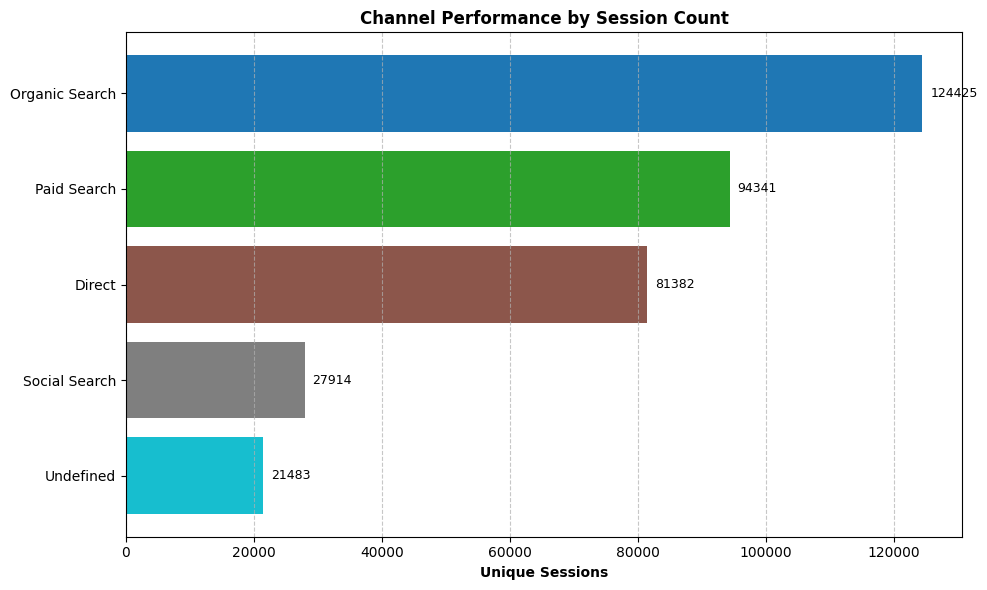

In [ ]:
# Visualization ofvChannel Performance Overview
colors = plt.cm.tab10(np.linspace(0, 1, len(chnl_performace)))
plt.figure(figsize=(10, 6))
plt.barh(
    chnl_performace.index,
    chnl_performace.values,
    color=colors
)

plt.xlabel('Unique Sessions', fontweight='bold')
plt.title('Channel Performance by Session Count', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, (channel, value) in enumerate(chnl_performace.items()):
    plt.text(value + max(chnl_performace.values)*0.01, i, str(value), va='center', fontsize=9)

plt.tight_layout()
plt.show()

**Channel performance analysis reveals which traffic sources generate the highest number of unique sessions. This allows you to:**

*Identify leading channels — for example, Organic Search shows the highest activity, indicating strong optimization or high brand awareness.*

*Uncover growth opportunities — channels with lower performance, such as Social Search or Undefined, may require additional attention or strategic adjustments.*

*Prioritize marketing resources — by investing in the most effective channels.*

In [ ]:
# Sales by Device
df['date_order'] = pd.to_datetime(df['date_order'])

grouped_sales_device = df.groupby(['date_order', 'device'])['price'].sum().sort_index()

print(grouped_sales_device)

date_order  device 
2020-11-01  desktop    144445.0
            mobile      99698.5
            tablet        149.0
2020-11-02  desktop    206727.3
            mobile     137269.5
                         ...   
2021-01-30  mobile          0.0
            tablet          0.0
2021-01-31  desktop         0.0
            mobile          0.0
            tablet          0.0
Name: price, Length: 276, dtype: float64


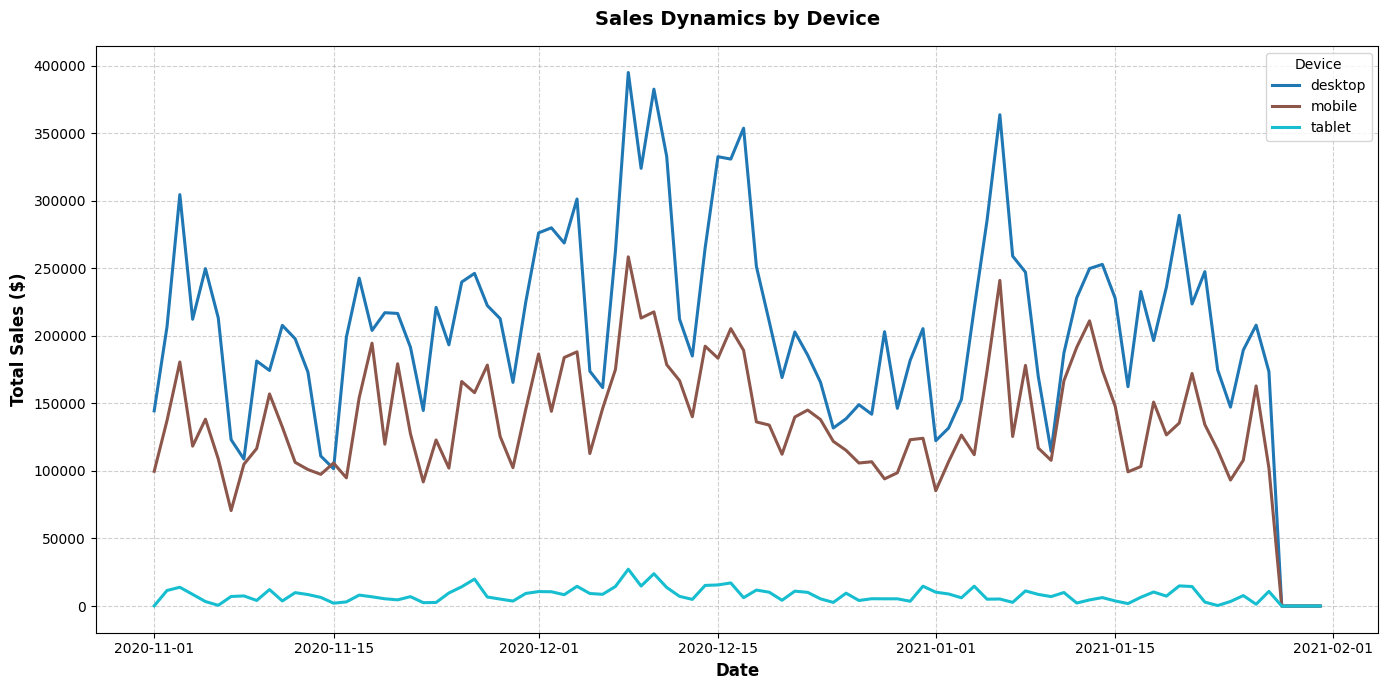

In [ ]:
# Visualisaion Sales by Device

grouped_sales_device = (
    df.groupby([df['date_order'].dt.date, 'device'])['price']
    .sum()
    .reset_index()
)

pivot_sales = grouped_sales_device.pivot(index='date_order', columns='device', values='price')

plt.figure(figsize=(14, 7))
colors = plt.cm.tab10(np.linspace(0, 1, len(pivot_sales.columns)))

for i, channel in enumerate(pivot_sales.columns):
    plt.plot(
        pivot_sales.index,
        pivot_sales[channel],
        label=channel,
        linewidth=2.2,
        color=colors[i]
    )

plt.title("Sales Dynamics by Device", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Date", fontsize=12, fontweight='bold')
plt.ylabel("Total Sales ($)", fontsize=12, fontweight='bold')
plt.legend(title="Device", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

**Desktop**— the leader in sales volume. Its chart shows sharp peaks and high variability, which may indicate corporate purchases, work-related traffic, or the convenience of placing orders from larger screens.

**Mobile** — a stable channel with lower amplitude but consistent sales. This reflects everyday user activity, with purchases made on the go. Investing in mobile optimization and faster load times is recommended.

**Tablet** — the lowest performance, with a flat trend. This may suggest poor interface adaptation or low device popularity among the target audience.

In [ ]:
# Device distribution
device_dstr = df.groupby('device')['session_id'].nunique().sort_values(ascending=False)
print(f"Device distribution - {device_dstr}")

# Device dominance in percentage
device_dominance = (device_dstr / device_dstr.sum() * 100)
print(f"Device dominance in percentage: {device_dominance.round(2)}")

Device distribution - device
desktop    204429
mobile     137267
tablet       7849
Name: session_id, dtype: int64
Device dominance in percentage: device
desktop    58.48
mobile     39.27
tablet      2.25
Name: session_id, dtype: float64


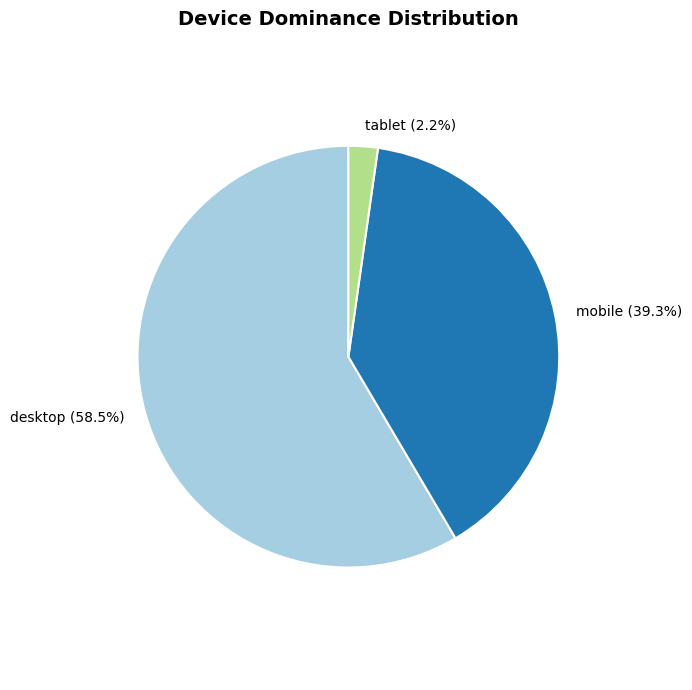

In [ ]:
# Visualisation of Device dominance in percentage
plt.figure(figsize=(7, 7))
colors = plt.cm.Paired(range(len(device_dominance)))
device_dominance_sorted = device_dominance.sort_values(ascending=False)
plt.pie(
    device_dominance_sorted,
    labels=[f"{label} ({value:.1f}%)" for label, value in zip(device_dominance_sorted.index, device_dominance_sorted.values)],
    autopct='',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)
plt.title('Device Dominance Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

**The device distribution shows which types of devices users most commonly use to place orders. This allows you to:**

*Identify the dominant platform — for example, if most orders come from desktops, it’s worth optimizing the interface specifically for them.*

*Assess mobile behavior — if the share of mobile devices is high, it’s important to ensure fast loading, responsive design, and intuitive navigation.*

*Spot niche segments — even a small share of tablet users may be significant for certain customer groups.*

*These insights are valuable for UX design, marketing decisions, and technical platform optimization.*

In [ ]:
# Pivot table that shows the number of sessions broken down by traffic channels and device types.
filtered_channel = df.dropna(subset=['channel', 'device'])
table = filtered_channel.pivot_table(index='device', columns='channel', values='session_id', aggfunc='count', fill_value=0)
print(table)



channel  Direct  Organic Search  Paid Search  Social Search  Undefined
device                                                                
desktop   47825           72622        55167          16288      12527
mobile    31745           49014        37034          10988       8486
tablet     1812            2789         2140            638        470


In [ ]:
# Pivot table that shows total sales by product categories (top 10 categories) across different countries (top 5 countries).
table_1 = pd.pivot_table(df,index='category', columns='country', values='price', aggfunc='sum',fill_value=0)

top_5_countries = table_1.sum(axis=0).nlargest(5).index
top_10_categories = table_1.sum(axis=1).nlargest(10).index

filtered_table = table_1.loc[top_10_categories , top_5_countries]
print(filtered_table)


country                           United States     India    Canada  \
category                                                              
Sofas & armchairs                     3707144.5  788430.0  692427.5   
Chairs                                2619773.8  544309.2  417740.8   
Beds                                  2213058.0  358319.5  354772.0   
Bookcases & shelving units            1567606.9  364507.4  278981.9   
Cabinets & cupboards                   994545.5  191888.0  181802.0   
Outdoor furniture                      929245.2  162289.4  185322.8   
Tables & desks                         777865.0  186157.5  132678.0   
Chests of drawers & drawer units       382388.0   73111.0   71952.0   
Bar furniture                          330805.0   57657.0   51724.0   
Children's furniture                   207575.0   39177.0   30264.0   

country                           United Kingdom    France  
category                                                    
Sofas & armchairs        

In [ ]:
# Pivot Table Sales by Channel and by Category
table_2 = pd.pivot_table(df, index='category', columns='channel', values='price', aggfunc='sum', fill_value=0)
print(table_2)

channel                                  Direct  Organic Search  Paid Search  \
category                                                                       
Bar furniture                          164452.0        257176.0     195842.0   
Beds                                  1130173.0       1808148.0    1300249.0   
Bookcases & shelving units             833634.1       1309674.2     986162.2   
Cabinets & cupboards                   549938.5        853306.5     617867.5   
Café furniture                          30315.0         52284.0      37857.0   
Chairs                                1454728.0       2192944.6    1658668.6   
Chests of drawers & drawer units       210388.0        309112.0     245290.0   
Children's furniture                   117089.0        173211.0     111367.0   
Nursery furniture                       27076.0         51336.0      40475.0   
Outdoor furniture                      542934.8        745654.8     554746.6   
Room dividers                           

In [ ]:
# Pivot Table Average Check by Category and by Country
table_3 = pd.pivot_table(df, index='category', columns='country', values='price', aggfunc='mean', fill_value=0)
print(table_3)

country                                 (not set)      Albania      Algeria  \
category                                                                      
Bar furniture                          572.888889   595.000000     0.000000   
Beds                                  2004.947368     0.000000   766.000000   
Bookcases & shelving units             403.080645  1385.000000   190.000000   
Cabinets & cupboards                  1001.500000     0.000000     0.000000   
Café furniture                         309.800000     0.000000     0.000000   
Chairs                                1158.281250  1455.000000   815.000000   
Chests of drawers & drawer units       585.125000     0.000000   139.000000   
Children's furniture                   109.687500     0.000000     0.000000   
Nursery furniture                      373.333333     0.000000     0.000000   
Outdoor furniture                     1112.986667     0.000000    83.666667   
Room dividers                         2397.000000   

In [ ]:
# Pivot Table Sales by Month and by Category
df['month_order'] = pd.to_datetime(df['date_order']).dt.to_period('M')
table_4 = pd.pivot_table(df,index='category', columns='month_order', values='price', aggfunc='sum', fill_value=0)
print(table_4)

month_order                             2020-11    2020-12    2021-01
category                                                             
Bar furniture                          244466.0   274391.0   216646.0
Beds                                  1396037.0  2021144.5  1502543.5
Bookcases & shelving units            1178001.3  1394184.8  1068632.0
Cabinets & cupboards                   707734.5   953360.5   675404.5
Café furniture                          43526.0    53524.0    41118.0
Chairs                                1804219.8  2450217.6  1893311.4
Chests of drawers & drawer units       283437.0   340897.0   282228.5
Children's furniture                   139234.0   182723.0   145740.0
Nursery furniture                       41819.0    49487.0    50301.0
Outdoor furniture                      676087.4   839107.4   627027.4
Room dividers                           31339.0    25097.0    33852.0
Sideboards, buffets & console tables    44145.0    40190.0    41995.0
Sofas & armchairs   

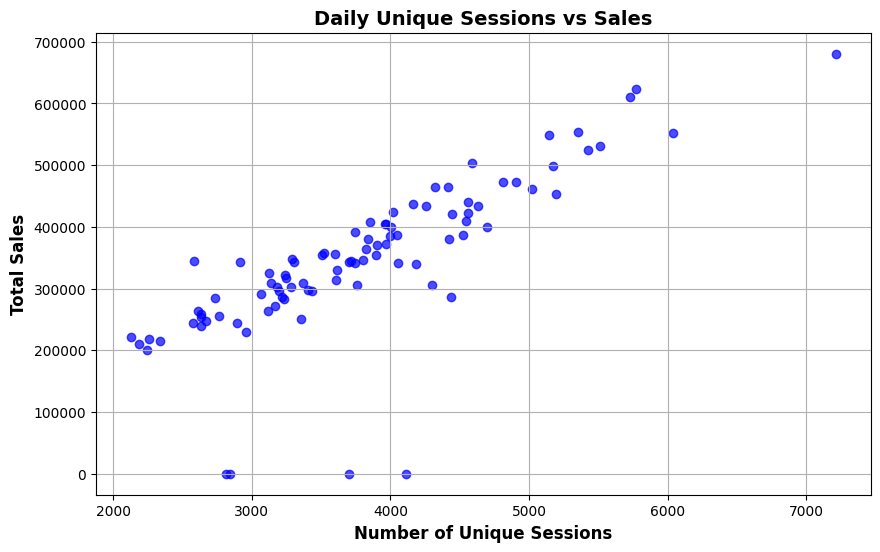

Correlation coefficient - 0.7911
P_value - 6.483532312080735e-21
Relationship is statistically significant.


In [ ]:
# Find the number of sessions and total sales for each date.
# Create a visualization to explore the relationship between these metrics.
# Do these indicators correlate? Calculate the appropriate correlation coefficient and analyze its statistical significance.

from scipy import stats

ses_sales_by_date = df.groupby('date_order').agg({
    'session_id': 'nunique',
    'price': 'sum'
})
ses_sales_by_date.columns = ['unique_session_count', 'sales_sum']


plt.figure(figsize=(10,6))
plt.scatter(
    ses_sales_by_date['unique_session_count'],
    ses_sales_by_date['sales_sum'],
    alpha=0.7, color='b'
)
plt.title('Daily Unique Sessions vs Sales', fontsize=14, fontweight='bold')
plt.xlabel('Number of Unique Sessions',fontsize=12, fontweight='bold')
plt.ylabel('Total Sales',fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

correlation_coefficient, p_value = stats.pearsonr(ses_sales_by_date['unique_session_count'], ses_sales_by_date['sales_sum'])
print(f"Correlation coefficient - {correlation_coefficient.round(4)}")
print(f"P_value - {p_value}")

alpha = 0.05 #Standard significance level

if p_value < alpha:
  print("Relationship is statistically significant.")
else:
  print("Relationship is NOT statistically significant.")

**Analysis** *of daily activity revealed a strong, statistically significant positive correlation between the number of unique sessions and total sales volume. This result confirms that growth in unique traffic directly translates into increased sales, and that this relationship is reliable. The identified correlation provides a clear rationale for increasing investment in marketing channels aimed at attracting new traffic.*

continent   Americas      Asia   Europe
date_order                             
2020-11-01  132002.5   63823.0  46908.0
2020-11-02  193861.0   79370.0  75710.8
2020-11-03  294529.8  126737.8  67692.0
2020-11-04  200009.5   66602.0  65915.0
2020-11-05  182988.2  117608.4  86540.0
...              ...       ...      ...
2021-01-27  166735.5   66783.1  48156.1
2021-01-28       0.0       0.0      0.0
2021-01-29       0.0       0.0      0.0
2021-01-30       0.0       0.0      0.0
2021-01-31       0.0       0.0      0.0

[92 rows x 3 columns]
continent  Americas      Asia    Europe
continent                              
Americas   1.000000  0.792025  0.770586
Asia       0.792025  1.000000  0.768427
Europe     0.770586  0.768427  1.000000


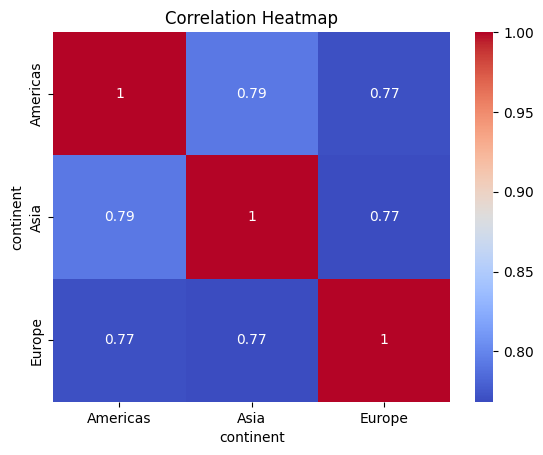

Statistical significance of correlations:
Americas vs Asia: r = 0.792, p = 0.0000 → correlation is significant
Americas vs Europe: r = 0.771, p = 0.0000 → correlation is significant
Asia vs Europe: r = 0.768, p = 0.0000 → correlation is significant

Spearman Rank Correlation (non-parametric):
Americas vs Asia: ρ = 0.710, p = 0.0000 → correlation significant
Americas vs Europe: ρ = 0.673, p = 0.0000 → correlation significant
Asia vs Europe: ρ = 0.657, p = 0.0000 → correlation significant


In [ ]:
# Are sales on different continents correlated? Take the top 3 continents.
# Analyze the statistical significance of the relationships.
top_3_continents = df.groupby('continent')['price'].sum().sort_values(ascending=False).head(3)
#print(top_3_continents)
top_3_names = top_3_continents.index.tolist()

sales_by_date_cont = df[df['continent'].isin(top_3_names)].groupby(['date_order', 'continent'])['price'].sum().unstack(fill_value=0)
print(sales_by_date_cont)

correlation_matrix = sales_by_date_cont.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
#Values ​​close to 1 — strong positive correlation
#Values ​​close to 0 — no relationship
#Values ​​close to -1 — strong inverse relationship


print("Statistical significance of correlations:")
for i in range(len(top_3_names)):
    for j in range(i + 1, len(top_3_names)):
        cont1 = top_3_names[i]
        cont2 = top_3_names[j]
        r, p = pearsonr(sales_by_date_cont[cont1], sales_by_date_cont[cont2])
        significance = "significant" if p < 0.05 else " not significant"
        print(f"{cont1} vs {cont2}: r = {r:.3f}, p = {p:.4f} → correlation is {significance}")

#Spearman
print("\nSpearman Rank Correlation (non-parametric):")
for cat1, cat2 in itertools.combinations(sales_by_date_cont, 2):
    rho, p = spearmanr(sales_by_date_cont[cat1], sales_by_date_cont[cat2])
    significance = "significant" if p < 0.05 else "not significant"
    print(f"{cat1} vs {cat2}: ρ = {rho:.3f}, p = {p:.4f} → correlation {significance}")



*According to the data, sales across the top three continents — Americas, Asia, and Europe — show a strong positive correlation (coefficients ranging from 0.77 to 0.79).*

*This indicates that sales trends in these markets evolve in sync — for example, an increase or decline in one region is often accompanied by similar changes in the others.*

*Pearson correlation results confirm that all observed relationships are statistically significant (p < 0.05), meaning the correlations are not random.*

*Spearman test results also confirmed monotonic relationships between continents, suggesting consistent trends even when the form of the relationship is not strictly linear.*

channel       Direct  Organic Search  Paid Search  Social Search  Undefined
date_order                                                                 
2020-11-01   54669.5         95112.0      64688.0        25078.0     4745.0
2020-11-02   81561.5        127746.5     104780.8        16843.0    24575.0
2020-11-03  102909.5        182521.9     152641.3        27652.5    33254.4
2020-11-04   79683.6        117067.1     100332.0        24257.4    17847.0
2020-11-05   83367.6        122938.4     107648.0        41693.2    35629.4
...              ...             ...          ...            ...        ...
2021-01-27   70423.1         92921.1      80869.5        16282.0    25845.0
2021-01-28       0.0             0.0          0.0            0.0        0.0
2021-01-29       0.0             0.0          0.0            0.0        0.0
2021-01-30       0.0             0.0          0.0            0.0        0.0
2021-01-31       0.0             0.0          0.0            0.0        0.0

[92 rows x 

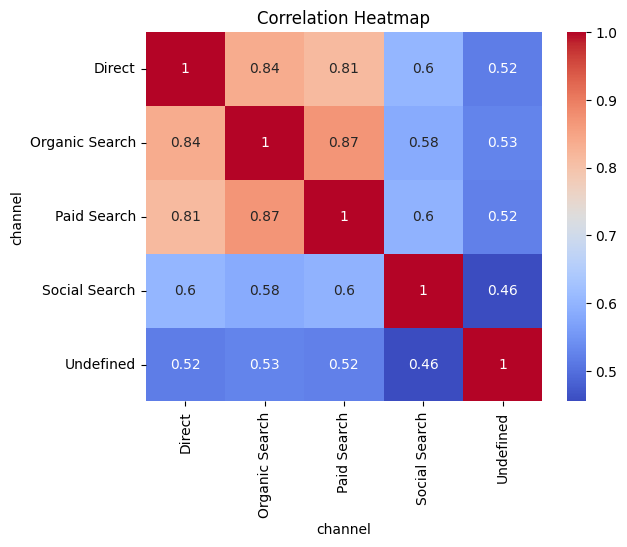

Statistical significance of correlations:
Organic Search vs Paid Search: r = 0.870, p = 0.0000 → correlation is significant
Organic Search vs Direct: r = 0.838, p = 0.0000 → correlation is significant
Organic Search vs Social Search: r = 0.583, p = 0.0000 → correlation is significant
Organic Search vs Undefined: r = 0.526, p = 0.0000 → correlation is significant
Paid Search vs Direct: r = 0.814, p = 0.0000 → correlation is significant
Paid Search vs Social Search: r = 0.596, p = 0.0000 → correlation is significant
Paid Search vs Undefined: r = 0.522, p = 0.0000 → correlation is significant
Direct vs Social Search: r = 0.604, p = 0.0000 → correlation is significant
Direct vs Undefined: r = 0.518, p = 0.0000 → correlation is significant
Social Search vs Undefined: r = 0.455, p = 0.0000 → correlation is significant

Spearman Rank Correlation (non-parametric):
Direct vs Organic Search: ρ = 0.780, p = 0.0000 → correlation significant
Direct vs Paid Search: ρ = 0.729, p = 0.0000 → correlatio

In [ ]:
#Are sales across different traffic channels correlated?
#Analyze the statistical significance of the relationships.

traffic_sales = df.groupby('channel')['price'].sum().sort_values(ascending=False)
#print(f"Sales by {traffic_sales}")
traffic_sales_conv = traffic_sales.index.tolist()
#print(traffic_sales_conv)

channel_sales_table = df[df['channel'].isin(traffic_sales_conv)].groupby(['date_order','channel'])['price'].sum().unstack(fill_value=0)
print(channel_sales_table)

correlation_matrix = channel_sales_table.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
#Values ​​close to 1 — strong positive correlation
#Values ​​close to 0 — no relationship
#Values ​​close to -1 — strong inverse relationshi

print("Statistical significance of correlations:")
for i in range(len(traffic_sales_conv)):
    for j in range(i + 1, len(traffic_sales_conv)):
        cont1 = traffic_sales_conv[i]
        cont2 = traffic_sales_conv[j]
        r, p = pearsonr(channel_sales_table[cont1], channel_sales_table[cont2])
        significance = "significant" if p < 0.05 else " not significant"
        print(f"{cont1} vs {cont2}: r = {r:.3f}, p = {p:.4f} → correlation is {significance}")

#Spearman
print("\nSpearman Rank Correlation (non-parametric):")
for cat1, cat2 in itertools.combinations(channel_sales_table, 2):
    rho, p = spearmanr(channel_sales_table[cat1], channel_sales_table[cat2])
    significance = "significant" if p < 0.05 else "not significant"
    print(f"{cat1} vs {cat2}: ρ = {rho:.3f}, p = {p:.4f} → correlation {significance}")


*The analysis revealed a strong positive correlation between sales across major traffic channels (coefficients ranging from ~0.75 to 0.9).*

*This means that an increase or decrease in sales within one channel (e.g., Direct) is often accompanied by similar changes in others (e.g., Organic Search or Paid Search).*

*Pearson correlation results confirm that all key relationships are statistically significant (p < 0.05), indicating that these correlations are not random and reflect genuine similarities in user behavior across channels.*

*Additionally, a Spearman rank test was conducted, which confirmed monotonic relationships between channels — even in cases where the dynamics are not strictly linear. This suggests consistent behavioral trends regardless of absolute sales values.*

*The correlation matrix visualization using a heatmap provided a quick and intuitive way to identify the most synchronized channels, which can be valuable for planning marketing campaigns.*


category       Beds  Bookcases & shelving units  Cabinets & cupboards  \
date_order                                                              
2020-11-01  14041.0                     36701.0               13591.5   
2020-11-02  79683.5                     40979.0               21623.0   
2020-11-03  66219.5                     64360.1               33555.5   
2020-11-04  48939.0                     35719.8               19266.0   
2020-11-05  23449.0                     40998.8               29235.0   
...             ...                         ...                   ...   
2021-01-23  37116.0                     29862.7               26068.0   
2021-01-24  23294.0                     25396.0               23664.5   
2021-01-25  47303.5                     25919.6               33028.0   
2021-01-26  69894.5                     39119.2               20218.0   
2021-01-27  43080.0                     33874.2               29739.0   

category     Chairs  Sofas & armchairs  
date_orde

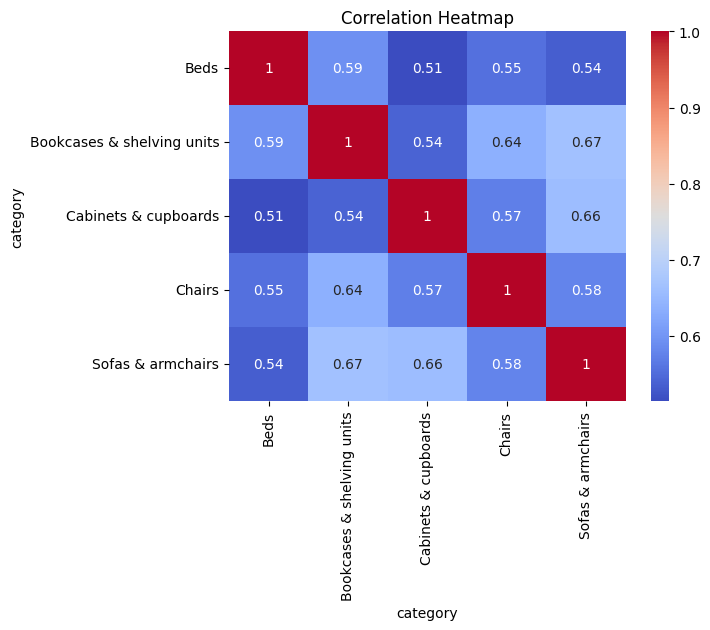

Statistical significance of correlations:
Sofas & armchairs vs Chairs: r = 0.578, p = 0.0000 → correlation is significant
Sofas & armchairs vs Beds: r = 0.535, p = 0.0000 → correlation is significant
Sofas & armchairs vs Bookcases & shelving units: r = 0.666, p = 0.0000 → correlation is significant
Sofas & armchairs vs Cabinets & cupboards: r = 0.658, p = 0.0000 → correlation is significant
Chairs vs Beds: r = 0.554, p = 0.0000 → correlation is significant
Chairs vs Bookcases & shelving units: r = 0.637, p = 0.0000 → correlation is significant
Chairs vs Cabinets & cupboards: r = 0.573, p = 0.0000 → correlation is significant
Beds vs Bookcases & shelving units: r = 0.593, p = 0.0000 → correlation is significant
Beds vs Cabinets & cupboards: r = 0.515, p = 0.0000 → correlation is significant
Bookcases & shelving units vs Cabinets & cupboards: r = 0.539, p = 0.0000 → correlation is significant

Spearman Rank Correlation (non-parametric):
Sofas & armchairs vs Chairs: ρ = 0.583, p = 0.0000 

In [ ]:
#Are sales by top 5 product categories correlated?
#Analyze the statistical significance of the relationships.

category_sales = df.groupby('category')['price'].sum().sort_values(ascending=False).head(5)
#print(category_sales)
top_5_categories = category_sales.index.tolist()
#print(top_5_categories)

category_sales_top_5 = df[df['category'].isin(top_5_categories)].groupby(['date_order','category'])['price'].sum().unstack(fill_value=0)
print(category_sales_top_5)

correlation_matrix_category = category_sales_top_5.corr()

sns.heatmap(correlation_matrix_category, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
#Values ​​close to 1 — strong positive correlation
#Values ​​close to 0 — no relationship
#Values ​​close to -1 — strong inverse relationshi

print("Statistical significance of correlations:")
for i in range(len(top_5_categories)):
    for j in range(i + 1, len(top_5_categories)):
        cont1 = top_5_categories[i]
        cont2 = top_5_categories[j]
        r, p = pearsonr(category_sales_top_5[cont1], category_sales_top_5[cont2])
        significance = "significant" if p < 0.05 else " not significant"
        print(f"{cont1} vs {cont2}: r = {r:.3f}, p = {p:.4f} → correlation is {significance}")


#Spearman

print("\nSpearman Rank Correlation (non-parametric):")
for cat1, cat2 in itertools.combinations(top_5_categories, 2):
    rho, p = spearmanr(category_sales_top_5[cat1], category_sales_top_5[cat2])
    significance = "significant" if p < 0.05 else "not significant"
    print(f"{cat1} vs {cat2}: ρ = {rho:.3f}, p = {p:.4f} → correlation {significance}")

Sales across the top 5 product categories show a strong correlation, both in the linear Pearson test and the rank-based Spearman test. All correlation coefficients fall within the ~0.75–0.95 range, indicating a strong positive relationship between categories.

**Statistical significance:**

All p-values are below 0.05 → the relationships are not random but statistically confirmed.

This means that demand dynamics are synchronized: periods of rising or falling sales tend to align across categories.

**Pearson vs Spearman comparison:**

Spearman values are very close to Pearson → the relationships are not only linear but also monotonic.

This confirms the stability of trends, even when growth rates differ between categories.

is_verified  Unverified_Sales  Verified_Sales
date_order                                   
2020-11-01            11030.0         10517.0
2020-11-02             9294.8         35662.0
2020-11-03             4973.0         24177.5
2020-11-04             9167.6         11814.6
2020-11-05             3056.0         22278.6
...                       ...             ...
2021-01-23             1685.0         14432.0
2021-01-24             2420.0         18494.0
2021-01-25            11541.0         22622.8
2021-01-26            11308.0         15905.6
2021-01-27             1550.0         13063.6

[88 rows x 2 columns]


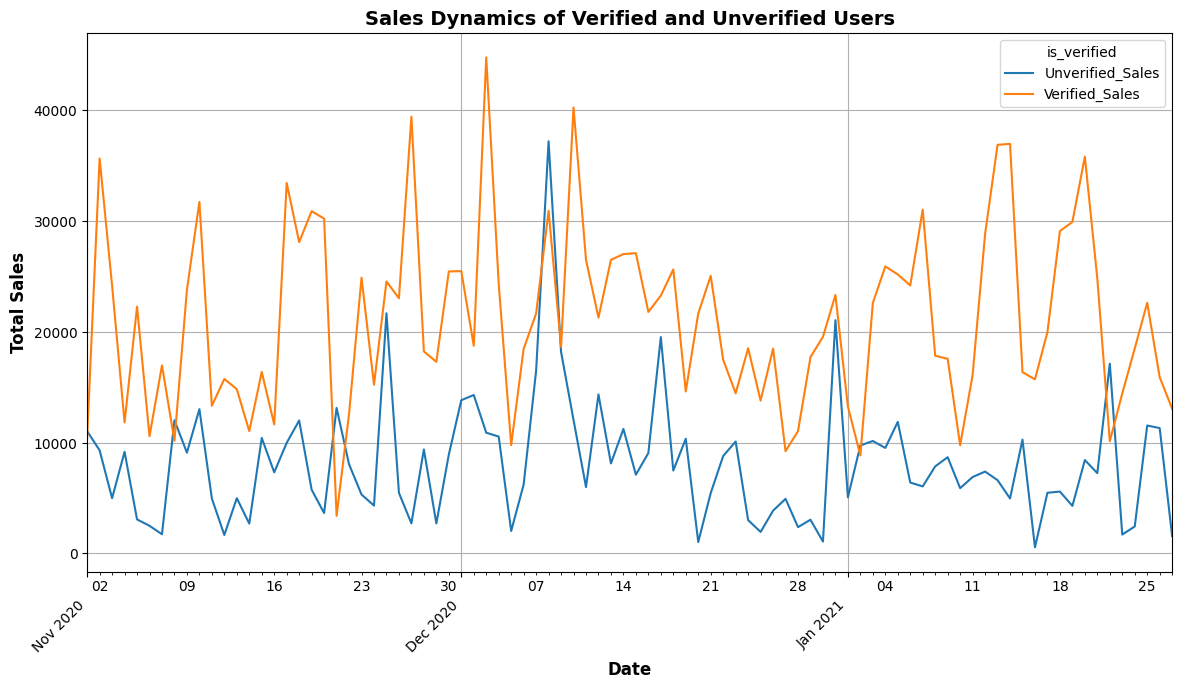

Unverified P_value - 1.660135980785686e-07
Verified P_value - 0.11325964679068223
Conclusion about normality of data
Distribution for one or both selection is NOT normal
Statistics=597.00, p=0.00
Significant difference unverified two verified users)
KS Statistic: 0.7159090909090909
P-value: 5.141863063472965e-22
Distribution is significantly different


In [ ]:
#Analyze sales for each date among verified and unverified users.
#Create the corresponding samples and analyze the data distributions in both groups.
#Select an appropriate statistical test to compare the samples.

sales_by_verification = df.groupby(['date_order', 'is_verified'])['price'].sum().unstack(fill_value=0)


sales_by_verification_renamed = sales_by_verification.rename(columns={
    0 : 'Unverified_Sales',
    1 : 'Verified_Sales'})
print(sales_by_verification_renamed)

sales_by_verification_renamed.plot(kind='line', figsize=(14, 7))

ax = plt.gca()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
ax.tick_params(axis='x', which='major', pad=15)

plt.title('Sales Dynamics of Verified and Unverified Users', fontsize=14, fontweight='bold')
plt.xlabel('Date',fontsize=12, fontweight='bold')
plt.ylabel('Total Sales',fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

# Normality test (Shapiro-Wilk)
unverified_sales = sales_by_verification_renamed['Unverified_Sales']
stat_unver, p_unver = shapiro(unverified_sales)
print(f"Unverified P_value - {p_unver}" )

verified_sales = sales_by_verification_renamed['Verified_Sales']
stat_ver, p_ver = shapiro(verified_sales)
print(f"Verified P_value - {p_ver}" )

alpha = 0.05
print(f"Conclusion about normality of data")
if p_unver < 0.05 or p_ver < 0.05:
  print("Distribution for one or both selection is NOT normal")
else:
  print("Distribution for one or both selection is normal")

#Mann and Whitney U test as distribution is NOT normal
stat, p_value = mannwhitneyu(unverified_sales, verified_sales, alternative = 'two-sided')
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
alpha = 0.05
if p_value < alpha:
    print('Significant difference unverified two verified users)')
else:
    print('No significant difference unverified two verified users)')

#Kolmogorov–Smirnov (KS test) → tests whether two distributions differ in general (not just in means).
alpha = 0.05
ks_statistic, p_value_ks = ks_2samp(unverified_sales, verified_sales)
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value_ks}")

if p_value_ks < alpha:
  print("Distribution is significantly different")
else:
  print("Distribution is NOT significantly different")



**Based on the analysis of daily sales among verified and unverified users, several statistical tests were conducted to evaluate the differences between the two groups:**

*Shapiro–Wilk test indicated that the sales distributions in at least one of the groups are not normal ($p < 0.05$).*

*Therefore, non-parametric analytical methods were chosen.Mann–Whitney U test found a statistically significant difference between the groups ($p < 0.05$).*

*This means that the sales generated by verified users differ significantly from the sales generated by unverified users.*

*Kolmogorov–Smirnov test confirmed that the distributions of the two samples are substantially different ($p < 0.05$).*

*This suggests not only a difference in mean values but also a general difference in the shape of the distributions*

In [ ]:
#Analyze the number of sessions across different traffic channels.
#Select an appropriate statistical test. Are there statistically significant differences between the groups?

sessions_by_day = df.groupby(['date_order','channel'])['session_id'].count().unstack(fill_value=0)
print(sessions_by_day)

#Kruskal-Wallis Test
H_statistic, p_value = kruskal(
    sessions_by_day['Direct'],
    sessions_by_day['Organic Search'],
    sessions_by_day['Paid Search'],
    sessions_by_day['Social Search'],
    sessions_by_day['Undefined']
)

alpha = 0.05

print(f"H-статистика: {H_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
  print("There is a significant difference between channels")
else:
  print("There is NO significant difference between channels")

# Grouping the number of sessions by date and channel
sessions_by_day = df.groupby(['date_order', 'channel'])['session_id'].count().unstack(fill_value=0)
print(sessions_by_day)

# ANOVA — comparison of mean values ​​between groups
F_statistic, p_value_anova = f_oneway(
    sessions_by_day['Direct'],
    sessions_by_day['Organic Search'],
    sessions_by_day['Paid Search'],
    sessions_by_day['Social Search'],
    sessions_by_day['Undefined']
)

alpha = 0.05

print(f"ANOVA F-statistic: {F_statistic:.4f}")
print(f"P-value: {p_value_anova:.4f}")

if p_value_anova < alpha:
    print("There is a statistically significant difference between traffic channels (ANOVA)")
else:
    print("There is NO statistically significant difference between traffic channels (ANOVA)")



channel     Direct  Organic Search  Paid Search  Social Search  Undefined
date_order                                                               
2020-11-01     608             920          706            214        128
2020-11-02     810            1242          970            315        262
2020-11-03    1216            1871         1367            392        327
2020-11-04     935            1425         1145            368        311
2020-11-05     845            1293          917            346        342
...            ...             ...          ...            ...        ...
2021-01-27     984            1561         1192            359        339
2021-01-28     997            1379         1107            364        265
2021-01-29     878            1319          988            288        227
2021-01-30     685             989          787            218        166
2021-01-31     644            1051          729            228        160

[92 rows x 5 columns]
H-статистика: 3

*The results of the **Kruskal–Wallis** test indicate that the number of sessions differs significantly across traffic channels. This suggests that some channels generate substantially more traffic than others. Accordingly, there are less effective channels with potential for improving sales performance.*

*The **ANOVA** test further confirms that the average number of sessions varies significantly between channels, reinforcing the conclusion that traffic is unevenly distributed. This statistical alignment strengthens the case for a deeper evaluation of underperforming channels and potential reallocation of marketing efforts to maximize reach and conversion.*

In [ ]:
# Is there a statistically significant difference in the share of Organic Search sessions between Europe and the Americas?
# Select an appropriate statistical test.
# Perform the necessary calculations to prepare the input data for the test.

total_sessions = df.groupby(['continent', 'channel'])['session_id'].count()
#print(total_sessions)

total_session_europe = total_sessions.loc[('Europe', 'Organic Search')]
#Convert Series to DataFrame
total_sessions_df = total_sessions.reset_index()
#print(total_sessions_df.columns)

europe_session = total_sessions_df[(total_sessions_df['channel'] == 'Organic Search') & (total_sessions_df['continent'] == 'Europe')]['session_id']
print(europe_session)
europe_session_total = total_sessions_df[total_sessions_df['continent'] == 'Europe']['session_id'].sum()
print(f"Total sessions in Europe: {europe_session_total}")
percentage_europe = europe_session / europe_session_total * 100
print(f"Percentage Organic Search from total Channels in Europe: {percentage_europe.round(2)}")

total_session_america = total_sessions.loc[('Americas', 'Organic Search')]
america_session = total_sessions_df[(total_sessions_df['channel'] == 'Organic Search') & (total_sessions_df['continent'] == 'Americas')]['session_id']
#print(america_session)
america_session_total = total_sessions_df[total_sessions_df['continent'] == 'Americas']['session_id'].sum()
percentage_america = america_session / america_session_total * 100
print(f"Percentage Organic Search from total Channels in America: {percentage_america.round(2)}")

# Number of sessions from Organic Search
counts = [europe_session.values[0], america_session.values[0]]
# Загальна кількість сесій у кожному регіоні
nobs = [europe_session_total, america_session_total]

# Z-тест
z_stat, p_value = proportions_ztest(count=counts, nobs=nobs)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
  print("There is a significant difference between Europe and America")
else:
  print("There is NO significant difference between Europe and America")


21    23195
Name: session_id, dtype: Int64
Total sessions in Europe: 65135
Percentage Organic Search from total Channels in Europe: 21    35.61
Name: session_id, dtype: Float64
Percentage Organic Search from total Channels in America: 11    35.55
Name: session_id, dtype: Float64
Z-statistic: 0.2895
P-value: 0.7722
There is NO significant difference between Europe and America


*There is no **statistically significant difference** in the proportion of Organic Search sessions relative to total sessions between Europe and the Americas.*

In [ ]:
# 1. KPI by Channel
channel_kpi_df = pd.DataFrame({
    'Channel': sales_channel.index,
    'Total_Sales': sales_channel.values,
    'Avg_Check': avg_check.values,
    'Total_Sessions': chnl_performace.values,
    'Unique_Accounts': unq_acc_per_channel.values
})
channel_kpi_df.to_csv('1_channel_kpi.csv', index=False, sep=';')

# 2. KPI by Device
device_kpi_df = pd.DataFrame({
    'Device': device_dstr.index,
    'Total_Sessions': device_dstr.values,
    'Dominance_Percent': device_dominance.values
})
device_kpi_df.to_csv('2_device_kpi.csv', index=False, sep=';')

# 3. Sales by Continent
sales_by_continent_df = pd.DataFrame({
    'Continent': sales_by_continent.index,
    'Total_Revenue': sales_by_continent.values
})
sales_by_continent_df.to_csv('3_continent_summary.csv', index=False, sep=';')

# 4. Dynamic by Continent
dynamics_continents_df = pd.DataFrame({
    'Date': grouped.index.get_level_values(0),
    'Continent': grouped.index.get_level_values(1),
    'Revenue': grouped.values
})
dynamics_continents_df.to_csv('4_dynamics_continent.csv', index=False, sep=';')

# 5. Dynamic by channel
dynamics_channels_df = pd.DataFrame({
    'Date': grouped_sales_channel.index.get_level_values(0),
    'Channel': grouped_sales_channel.index.get_level_values(1),
    'Revenue': grouped_sales_channel.values
})
dynamics_channels_df.to_csv('5_dynamics_channel.csv', index=False, sep=';')

# 6. Daily Revenue
daily_revenue_df = pd.DataFrame({
    'Date': date_revenue.index,
    'Total_Revenue': date_revenue.values
})
daily_revenue_df.to_csv('6_daily_revenue.csv', index=False, sep=';')

sales_by_verification_renamed.to_csv('sales_by_verification.csv')

print("\nExport is completed.")
print("6 CSV files with a semicolon delimiter have been created, ready for upload to Tableau.")



Export is completed.
6 CSV files with a semicolon delimiter have been created, ready for upload to Tableau.


**Analytical Dashboard: Channel & Geographic Revenue:**

[Go to the Tableau Dashboard](https://public.tableau.com/app/profile/arthur.trietiakov/viz/PortfolioTablo/Dashboard1?publish=yes)

